## Hi Guys! Today, I have chosen an important problem statement to work upon. Let me break it down into simple words, and you will soon understand its importance.  

### -  Financial institutions invest a ton of money for constructing credit risk analysis models to determine the probability of default of a potential borrower. The models provide information on the level of a borrower's credit risk at any particular time. 

### -  Some of you might be wondering what "credit" is. Well here's come the definition:

<div style="width:100%;text-align: center;"> <img align=middle src="https://www.greenbiz.com/sites/default/files/2020-09/definition_conceptart.jpg" alt="Heat beating" style="height:300px;margin-top:3rem;"> </div>

### <span style="color:red;"> - "Credit is the ability to borrow money or access goods or services with the understanding that you'll pay later." </span>

### <span style="color:blue;"> - "Creditworthiness is how a lender determines that you will default on your debt obligations, or how worthy you are to receive new credit. Your creditworthiness is what creditors look at before they approve any new credit to you." </span>

### Credit risks are a commonly observed phenomenon in areas of finance that relate to mortgages, credit cards, and other kinds of loans. There is always a probability that the borrower may not get back with the amount.

So it is important that when a borrower applies for a loan, the lender or the issuer must establish and examine the borrower’s ability to repay the loan. So in this notebook, I will be doing the following stuff:

1. Exploring the Dataset(**EDA**)
2. Applying **Oversampling** Techniques
3. Test various machine learning models using **Cross Validation** technique
4. **Hyperparameter tune** the best model
5. Analyse the best model with the help of relevant **Metrics** 
6. **Pickling** the best model 
7. Creating an **UI**(User Interface) with the help of **Streamlit** 
8. **Deployment** on **Heroku** platform
9. A **sample prediction** will be made to test the application

The 7th and 8th steps will be shown and explained with the help of screenshots.

Importing the necessary header files:

In [ ]:
## Basic Libraries:
import pandas as pd
pd.options.display.max_colwidth=150   ## this is used to set the column width.

## Note: Other available must know options are:
# pd.options.display.max_rows=x  ## controls the max rows to be displayed on screen
# pd.options.display.max_columns=x  ## controls the max columns to be displayed on screen
# pd.options.display.precision=x  ## controls the precision of each floating points to be displayed on screen
# pd.options.display.float_format = '{:.2f}%'.format  ## controls the format of displaying numbers on screen. 
                                                      ## For eg.{$(:,.2f)} can be used for currency

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import time
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

plt.style.use('fivethirtyeight') ## Setting the Style

## For making sample data:
from sklearn.datasets import make_classification

## For Preprocessing: 
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, RepeatedKFold,RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Using imblearn library:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

## Using msno Library for Missing Value analysis:
import missingno as msno

## For Metrics:
from sklearn.metrics import plot_precision_recall_curve,accuracy_score,matthews_corrcoef
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

## For Machine Learning Models:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

## For Feature Importance:
!pip install shap
import shap

In [ ]:
## Setting the seed to allow reproducibility
np.random.seed(31415)

# 1. Exploring the Dataset(EDA)

## About the Dataset:

### The dataset consists of the following features:

#### -- Independent Variables:

- Name:	Description

- person_age:	Age of the person 

- person_income:	Annual Income

- personhomeownership:	Home ownership

- personemplength:	Employment length (in years)

- loan_intent:	Loan intent

- loan_grade:	Loan grade

- loan_amnt:	Loan amount

- loanintrate:	Interest rate

- loanpercentincome:	Percent income

- cbpersondefaultonfile:	Historical default

- cbpresoncredhistlength:	Credit history length

#### -- Target Variable:

- loan_status:	Loan status (0 is non-default/1 is default)

### Reading the dataset:

In [ ]:
df = pd.read_csv("/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv")
df.head()

In [ ]:
df.shape[0],df.shape[1]

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
## Checking for Duplicates
dups = df.duplicated()
dups.value_counts() #There are 165 Duplicated rows

In [ ]:
## Removing the Duplicates
print(f"Shape of Data before removing duplicates -----> ({df.shape[0]},{df.shape[1]}) \n")
df.drop_duplicates(inplace=True)
print(f"Shape of Data after removing duplicates -----> ({df.shape[0]},{df.shape[1]})")

In [ ]:
ccol=df.select_dtypes(include=["object"]).columns
ncol=df.select_dtypes(include=["int","float"]).columns

print("The number of Categorical columns are:",len(ccol))
print("The number of Numerical columns are:",len(ncol))

#### - Printing the different columns with their cardinality (number of unique elements in each column):

In [ ]:
print("The NUMERICAL columns are:\n")
for i in ncol:
    print("->",i,"-",df[i].nunique())
    
print("\n---------------------------\n")
print("The CATEGORICAL columns are:\n")
for i in ccol:
    print("->",i,"-",df[i].nunique())

#### - Analysing the Target variable:

In [ ]:
df["loan_status"].value_counts(normalize=True)

#### The Data is highly **IMBALANCED**. We will deal with oversampling techniques like KNN-SMOTE to solve this issue.

### - Checking for Missing Data:

#### Missing data, or missing values, occur when you don’t have data stored for certain variables or participants. Data can go missing due to incomplete data entry, equipment malfunctions, lost files, and many other reasons.

#### There are typically 3 types of missing values:

**1. Missing completely at random (MCAR)**

**2. Missing at random (MAR)**

**3. Missing not at random (MNAR)**

#### **Problems:**

#### Missing data are problematic because, depending on the type, they can sometimes cause sampling bias. This means your results may not be generalizable outside of your study because your data come from an unrepresentative sample.

In [ ]:
## Checking for Missing values:
df.isnull().any()

In [ ]:
df.isna().sum()

In [ ]:
mn=df.isna().sum()
mn=pd.DataFrame(mn,columns=["missing_count"]).reset_index()
mn.columns=["columns_names","missing_count"]

sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,10))
plots=sns.barplot(x=mn.columns_names,y=mn.missing_count)
# Iterating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=45) #Rotating the Label
plt.title("Missing values in every column.",size=25,weight="bold") #Title of the plot
plt.xlabel("Columns",fontsize=20) #Title of x-axis
plt.ylabel("Missing_Count",fontsize=20)
plt.tick_params(labelsize=10) #Varying label size
plt.tight_layout()

### Using missing number visualiser to review the missing data:

#### - On the **left** side of the plot, the y-axis scale ranges from 0.0 to 1.0, where 1.0 represents 100% data completeness. If the bar is less than this, it indicates that we have missing values within that column.

#### - On the **right** side of the plot, the scale is measured in index values. With the top right representing the maximum number of rows within the dataframe.

#### - Along the **top** of the plot, there are a series of numbers that represent the total count of the non-null values within that column.

In [ ]:
msno.bar(df)

#### - The matrix plot is a great tool if you are working with depth-related data or time-series data. It provides a colour fill for each column. When data is present, the plot is shaded in grey (or your colour of choice), and when it is absent the plot is displayed in white.

In [ ]:
msno.matrix(df)

#### - The heatmap is used to identify correlations of the nullity between each of the different columns. 

#### - Here no correlation is detected between columns having missing values.

In [ ]:
msno.heatmap(df)

In [ ]:
## Missing values in each target class:
l=df.groupby(["loan_status"])["loan_int_rate"].apply(lambda x:x.isnull().sum())
p=df.groupby(["loan_status"])["person_emp_length"].apply(lambda x:x.isnull().sum())

fig,ax=plt.subplots(1,2,figsize=(10,10))
ax[0].set_title("Missing values in loan_int_rate")
ax[0].pie(l.values, labels=l.index, colors=sns.color_palette('bright'), autopct='%.0f%%')

ax[1].set_title("Missing values in person_emp_length")
ax[1].pie(p.values, labels=p.index, colors=sns.color_palette('cool'), autopct='%.0f%%')
fig.show()

Still to do:

1. Splitting
2. Iterative Imputation   ## done after splitting
3. Oversampling  ## done after splitting

#### NOTE: EVERY PREPROCESSING TECHNIQUE IS DONE ONLY ON THE TRAIN SET. SO SPLITTING IS MANDATORY BEFORE OUTLIER REMOVAL, MISSING VALUES HANDLING, OVERSAMPLING, ETC...

#### - Time to handle the missing values. First we will split the data:

In [ ]:
# X and y will represent the entire training data
# X_test and y_test will be the sample data for model evaluation

X, X_test, y, y_test = train_test_split(df.drop('loan_status', axis=1), df['loan_status'],
                                        random_state=0,  test_size=0.2, stratify=df['loan_status'],
                                        shuffle=True)

#### - We have stratified sampled the data (checking the proportion of the target variable):

In [ ]:
y.value_counts(normalize=True)   #Note that the proportion remains the same because of stratify.

In [ ]:
y_test.value_counts(normalize=True)

#### The proportion is preserved!

In [ ]:
## Checking for missing values in train data:
(X.shape[0]-X.dropna().shape[0])/X.shape[0]*100
## There are 12% missing data in the train set

In [ ]:
#To print the number of unique values:
for col in X:
    print(col, '--->', X[col].nunique())
    if X[col].nunique()<20:
        print(X[col].value_counts(normalize=True)*100)
    print()

### **Removing Outliers** based on Domain Knowledge:

#### - Using common sense, we can exclude rows whose age is >80.

In [ ]:
X.loc[X['person_age']>=80, :]  

In [ ]:
X.shape   ## shape before removal

In [ ]:
X = X.loc[X['person_age']<80, :]

In [ ]:
X.shape  ## shape after removal

#### - We can also exclude rows whose work experience is >60 (Assuming average Upper bound of employement).

In [ ]:
X.loc[X['person_emp_length']>=60, :]

In [ ]:
X = X.loc[X['person_emp_length']<60, :]

In [ ]:
# Since we've removed some data from X, we need to pass on these updations to y as well,
# as y doesn't know some of its corresponding X's have been deleted.
y = y[X.index]

#### - Checking the distribution of the Target variable:

In [ ]:
y.value_counts()

## Part 1:

Automate the procedure for multiple classifiers

Plot Learning Curve (for bias-variance tradeoff / check for overfitting-underfitting)

# Creating the Best Pipeline:

#### The Main Pipeline will be made of **two** parts:

- Preprocessing for **NUMERICAL VARIABLES**:

1. **Iterative imputer** - To handle missing values    
2. **SMOTE** - To handle imbalance in the dataset
3. **Scaling** - To maintain the scale among features

- Preprocessing for **CATEGORICAL VARIABLES**:

1. **One Hot Encoder** - To encode each categoric for model interpretability

#### - The bottom code snippet is a small picture for something big to come. 

**NOTE:** It is always important for any Data Scientist to try out their methods and solutions on smaller data(readily available data), before they can actually dwelve into their own dataset. This will make it easier to debug code.

#### - Sample Test Code:

In [ ]:
# ## Making artificial data with the help of sklearn's make_classification method:
# X,y=make_classification(10000,20,n_classes=2,weights=[0.75])

# ## Gives count of each target's class:
# uni,cnt=np.unique(y,return_counts=True)
# for i,(j,k) in enumerate(zip(uni,cnt)):
#     print(j,"--",k)

# X=pd.DataFrame(X)

# ## Function to select random indexes:
# def create_index(nrows):
#     l=np.random.randint(0,nrows,50)
#     return l

# ## Making some rows as Null.
# for i in range(X.shape[1]):
#     X.iloc[create_index(X.shape[0]),i]=None
    
# ## To check the null values in every column:
# X.isnull().sum()

# ## Splitting:
# X_train,X_test,y_train,y_test=train_test_split(X,y)

# ## Making sample pipeline
# over = SMOTE() ## Object for smote #sampling_strategy=0.1
# model = DecisionTreeClassifier()
# steps = [('impute', IterativeImputer()),('over', over),('model', model)]
# pipeline = Pipeline(steps=steps)

# pipeline.fit(X_train,y_train)

# res=pipeline.predict(X_test)

# print(f"The accuracy of the Decision Tree Model is:{accuracy_score(y_test,res)}")

#### - In this notebook, I am primarily testing the performance of **XGBoost** and **LightGBM** models, along with hyperparameter tuning. 

***Optional***:: You can try out other models as well. I have commented out some lines of code for the users to play with.

#### - The following table presents you with the most important available hyperparameters of eXtreme Gradient Boosting Machines(XGBM):

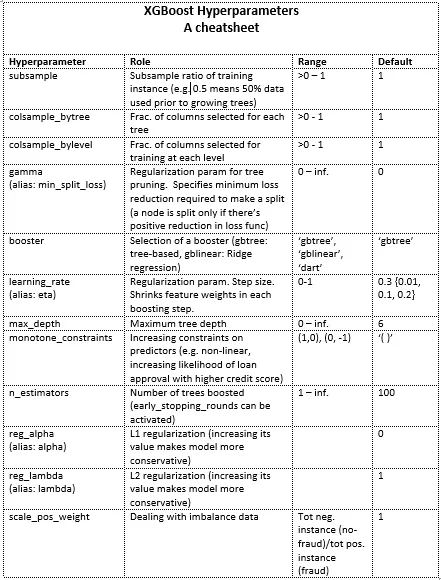

In [ ]:
## Original Pipeline:

### 1. Creating a pipeline for numerical columns:
num_pipe = Pipeline([
    ('impute', IterativeImputer()),     #MICE (Multivariate Imputation by Chained Equations)
    ('scale', StandardScaler()),
])

### 2. Using the Column Transformer class for binding the above numeric pipeline and
###    the preprocessing steps of categorical columns:
### Here, for keeping a list of numeric and categorical columns, I have used the make_column_selector method. You can read more 
### about it here: https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_selector.html

ct = ColumnTransformer([
    ('num_pipe', num_pipe, make_column_selector(dtype_include=np.number)),
    ('cat_cols', OneHotEncoder(sparse=False, handle_unknown='ignore'), make_column_selector(dtype_include=object))
], remainder='passthrough')


## Setting up the models to be tested upon and the parameters for their pipelines'::

grid = {
    XGBClassifier():
    {'model__n_estimators':[i*100 for i in range(10)],
     'model__max_depth':[6,8,10,12,14,16],
     'model__learning_rate':[0.01, 0.05, 0.1, 0.15, 0.2, 0.3],
     'coltf__num_pipe__impute__estimator':[LinearRegression(), RandomForestRegressor(random_state=0), #coltf is the name of the final 
                                        KNeighborsRegressor()]},                                      #pipeline. The base estimator of 
                                                                                                #iterative imputer is also considered
    LGBMClassifier(class_weight='balanced', random_state=0):                                          # as a parameter
    {'model__n_estimators':[300,400,500],
     'model__learning_rate':[0.001,0.01,0.1,1,10],
     'model__boosting_type': ['gbdt', 'goss', 'dart'],
     'coltf__num_pipe__impute__estimator':[LinearRegression(), RandomForestRegressor(random_state=0),
                                        KNeighborsRegressor()]}    
#     RandomForestClassifier(random_state=0, class_weight='balanced'):
#     {'model__n_estimators':[300,400,500],
#      'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0), 
#                                         KNeighborsRegressor()]},                                       
                                                                                                       
#     KNeighborsClassifier(n_jobs=-1):
#     {'model__n_neighbors':[4,5,6,7,8,9],
#      'model__weights':['uniform', 'distance'],        
#      'coltf__num_pipe__impute__estimator':[LinearRegression(), RandomForestRegressor(random_state=0),
#                                         KNeighborsRegressor()]}   
}

#### - Printing out the parameters:

In [ ]:
for i,(clf, param) in enumerate(grid.items()):
    print(f"{i+1}. {clf}")
    print(f"\nList of Hyperparameters: {param}")
    print('-'*50)

#### - Finding the optimal model and its best hyperparameters using Randomized Search and Cross-Validation(**RandomizedSearchCV**):

In [ ]:
full_df = pd.DataFrame()
best_algos = {}

for model, param in grid.items():
    pipe = Pipeline([
    ('coltf', ct),       #ct for the column transformer for preprocessing
    ('model', model)
])
    print(f"Training {model}!!\n")
    ## Conducting a Randomized Search to find the best optimal hyperparamaters:
    gs = RandomizedSearchCV(estimator=pipe, param_distributions=param, scoring='accuracy',verbose=3, n_iter=4, random_state=0)
    
    print("Fitting!!\n")
    gs.fit(X, y)
    
    print("Gathering Results!!\n")
    all_res = pd.DataFrame(gs.cv_results_)

    temp = all_res.loc[:, ['params', 'mean_test_score']]
    algo_name = str(model).split('(')[0]
    temp['algo'] = algo_name
    
    full_df = pd.concat([full_df, temp], ignore_index=True)
    best_algos[algo_name] = gs.best_estimator_

#### - Displaying the list of pipelines tried and choosing the best performed model:

In [ ]:
full_df.sort_values('mean_test_score', ascending=False)

In [ ]:
full_df.sort_values('mean_test_score', ascending=False).iloc[0, 0]

In [ ]:
## Getting the pipeline of the best XGB Algorithm and LGB Algorithm:
be_xgb = best_algos['XGBClassifier']
be_lgb = best_algos['LGBClassifier']
be_xgb,be_lgb

### - Training the best pipelines:

**Repeated k-Fold Cross-Validation** provides a way to improve the estimated performance of a machine learning model. This involves simply repeating the cross-validation procedure multiple times and reporting the mean result across all folds from all runs. This mean result is expected to be a more accurate estimate of the true unknown underlying mean performance of the model on the dataset, as calculated using the standard error.

We will use this technique here to test model performance once again before evaluating it.

In [ ]:
## A dry run of the best pipeline:
pipe = be
# evaluate pipeline using k-fold cross validation:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(pipe, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores.mean()

In [ ]:
## Fitting into best pipeline for evaluation:
pipe.fit(X, y)
## Getting predictions:
preds_xgb = pipe.predict(X_test)
## Getting probabilities:
probs_xgb = pipe.predict_proba(X_test)

In [ ]:
accuracy_score(y_test,preds_xgb)

#### - Viewing the predicted probabilities obtained for the test data:

In [ ]:
probs_xgb

### Learning Curve:

#### - Plotting the **learning curve** is important to analyse whether the model is generalising properly.

In [ ]:
%%time
def funct_lc(be,X_train,y_train,title):
    a, b, c = learning_curve(be, X_train, y_train, n_jobs=-1, scoring='accuracy')
    plt.title(f"{title}")
    plt.plot(a, b.mean(axis=1), label='Training Accuracy')
    plt.plot(a, c.mean(axis=1),  label='Validation Accuracy')
    plt.xlabel('Training sample sizes')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
funct_lc(be_xgb,X,y,"XGB Pipeline")

### Evaluating the results of the best model:

In [ ]:
## Function for confusion matrix:
def funct_cm(be,X_test,y_test,preds,title):
    ## Simple Confusion Matrix:
    confusion_matrix(y_test, preds)
    
    print(f"The Confusion Matrix for the {title}:")
    ## Plotting the Confusion Matrix:
    plot_confusion_matrix(be, X_test, y_test)
    
    print(f"The Classification Report for the {title}:")
    ## Classification Report:
    classification_report(y_test, preds)
    
    print(f"The Final Accuracy Score for the {title}:")
    ## Accuracy Score
    be.score(X_test, y_test)
    
funct_cm(be_xgb,X_test,y_test,preds_xgb,"XGB Pipeline")

In [ ]:
print(f"The accuracy score of the XGB model is: {accuracy_score(y_test,preds_xgb)}!")

#### Final Accuracy on test set is **93.64**%

### Plotting the **Precision-Recall** Curve:

In [ ]:
%%time
def funct_pr(be,X_test,y_test,title):
    plot_precision_recall_curve(estimator=be, X=X_test, y=y_test, name='model AUC')
    baseline = y_test.sum() / len(y_test)
    plt.axhline(baseline, ls='--', color='r', label=f'Baseline model ({round(baseline,2)})')
    plt.title(f"{title}")
    plt.legend(loc='best')
    plt.show()
    
funct_pr(be_xgb,X_test,y_test,"XGB Pipeline")

### Plotting the **ROC Curve** and calculating **AUC**:

In [ ]:
def funct_roc(y_test,preds,title):
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    # method I: plt
    plt.figure(figsize=(8,8))
    plt.title(f'Receiver Operating Characteristic of {title}')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

#     # method II: ggplot
#     from ggplot import *
#     df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
#     ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')
    
funct_roc(y_test,preds_xgb,"XGB Pipeline")

### Calculating **MCC**:

**Matthews correlation coefficient** (MCC) is a metric we can use to assess the **performance** of a classification model.

It is calculated as:

**MCC = (TP\*TN – FP\*FN) / √(TP+FP)(TP+FN)(TN+FP)(TN+FN)**

This metric is particularly useful when the two classes are **imbalanced**.

The value for MCC ranges from **-1 to 1** where:

* -1 indicates total disagreement between predicted classes and actual classes
* 0 is synonymous with completely random guessing
* 1 indicates total agreement between predicted classes and actual classes

In [ ]:
print(f"The MCC score of XGB Pipeline is:{matthews_corrcoef(y_test, preds_xgb)}")

### Feature Importance:

**1. Using the embedded FI:**

In [73]:
def funct_fi(pipeline,X):
    fi=pipeline.steps[1][1].feature_importances_  ## Returns the list of feature importance from model inside the pipeline
    feat_importances = pd.Series(fi, index=X.columns)
    feat_importances.nlargest(20).plot(kind='barh')
    
funct_fi(pipe,X)

ValueError: Length of values (26) does not match length of index (11)

**2. Using SHAP Package:**

In [77]:
def shap_fe(X,y,pipeline):
    # compute SHAP values

    explainer = shap.TreeExplainer(pipeline.steps[1][1])
    shap_values = explainer.shap_values(X)

    # explainer = shap.Explainer(model)
    # shap_values = explainer(X)

    shap.summary_plot(shap_values, X, class_names= [0,1], feature_names = X.columns,show=False)

    vals= np.abs(shap_values[1]).mean(0)
    df_feature_importance=pd.DataFrame(np.concatenate([np.array(df.columns).reshape(-1,1),vals.reshape(-1,1)],axis=1),columns=["Feature","Shap_Scores"])
    df_feature_importance = df_feature_importance.sort_values('Shap_Scores',ascending=False)
    df_feature_importance.reset_index(drop=True,inplace=True)
    return df_feature_importance

shap_fi=shap_fe(X,y,pipe)

TypeError: shap_values() got an unexpected keyword argument 'enable_categorical'

In [76]:
## Printing out the feature importance of each independent variable according to SHAP:
shap_fi

NameError: name 'shap_fi' is not defined